## Predicción del valor del dolar

Vamos a realizar una regresión lineal con los datos de dataset: TRM_Historico.xls para predecir el valor del dolar el día 23-nov-2018, día en que se realizará el evento.

In [10]:
# importando librerias necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

In [11]:
dolars = pd.read_excel('datasets/TRM_Historico.xls')

In [12]:
# explorando el dataset
dolars.head()

,Fecha,TRM
0,1991-11-27,693.32
1,1991-11-28,693.99
2,1991-11-29,694.70
3,1991-11-30,694.70
4,1991-12-01,643.42


In [13]:
# consultando los tipos de datos
dolars.dtypes

Fecha    datetime64[ns]
TRM             float64
dtype: object

In [14]:
# informacion del dataset
dolars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9821 entries, 0 to 9820
Data columns (total 2 columns):
Fecha    9821 non-null datetime64[ns]
TRM      9821 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 153.5 KB


In [15]:
dolars.describe()

,TRM
count,9821.000000
mean,1947.144108
std,705.396325
min,620.620000
25%,1397.120000
50%,1965.830000
75%,2389.750000
max,3434.890000


In [17]:
# modificar indice

dolars.index = dolars.Fecha
dolars.index.names = ['index']

In [18]:
dolars.head()

,Fecha,TRM
index,,
1991-11-27,1991-11-27,693.32
1991-11-28,1991-11-28,693.99
1991-11-29,1991-11-29,694.70
1991-11-30,1991-11-30,694.70
1991-12-01,1991-12-01,643.42


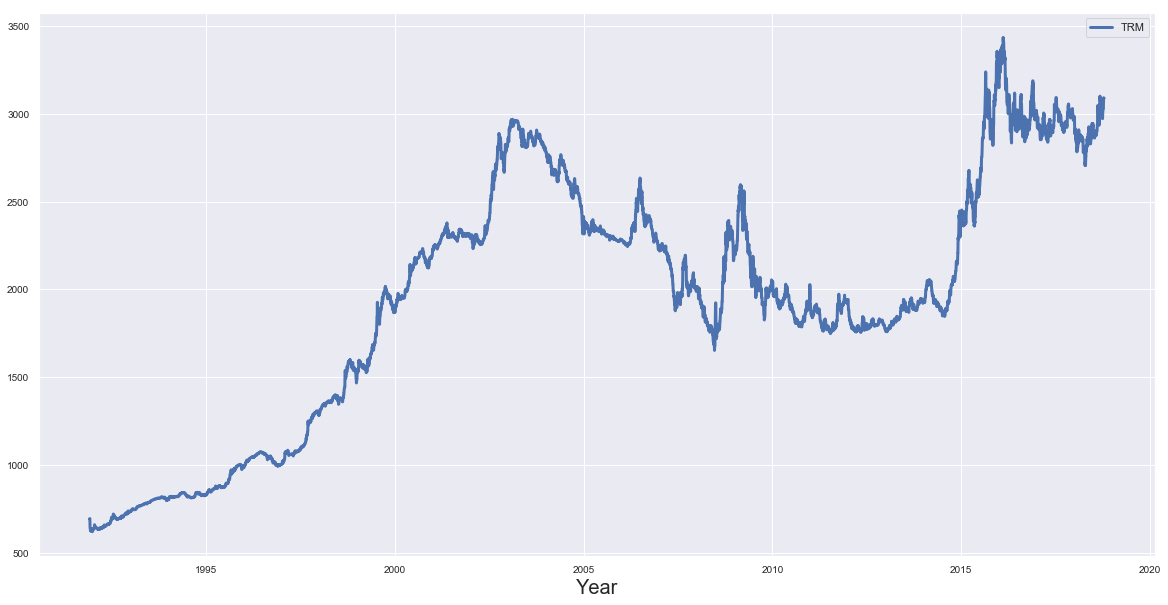

In [19]:
# previsualizar data 

dolars.plot(x='Fecha', y='TRM', figsize=(20,10), linewidth=3, fontsize=10)
plt.xlabel('Year', fontsize=20);
plt.show()

In [10]:
# df_2000 = dolars.loc[pd.Timestamp('2000-01-01'):pd.Timestamp('2018-12-31')]

Un modelo de regresión lineal solo funciona sobre tipos numericos, así que vamos a transformar nuestra fecha.

In [20]:
dolars['Fecha'].dtype


dtype('<M8[ns]')

In [21]:
import datetime as dt
dolars['Fecha'] = pd.to_datetime(dolars['Fecha'])
dolars['Fecha'] = dolars['Fecha'].map(dt.datetime.toordinal)

In [22]:
dolars['Fecha'].dtype

dtype('int64')

In [23]:
dataX = dolars[["Fecha"]]

# genero el array 2d con indice y fecha
dates = np.array(dataX)

# valores del dolar en el indice X_train
prices = dolars['TRM'].values

In [24]:
dolars.tail()

,Fecha,TRM
index,,
2018-10-12,736979,3087.34
2018-10-13,736980,3088.78
2018-10-14,736981,3088.78
2018-10-15,736982,3088.78
2018-10-16,736983,3088.78


In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# separar datos dataset de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(dates, prices)

In [28]:
# Creamos el objeto LinearRegression (Modelo)
regr = LinearRegression()

# Ajustamos a nuestro modelo con los datos
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
# Imprimimos el Coeficiente estimado para el problema
print('Coeficiente: \n', regr.coef_, regr.intercept_)

Coeficiente: 
 [0.18513293] -133587.35860147898


In [30]:
regr.predict(X_test)

array([1622.06717886, 1329.18688992, 2627.70923292, ..., 2270.03241988,
       1563.75030717, 1580.22713758])

In [31]:
y_predic = regr.predict(X_test)

vamos a comparar con el primer dato de prueba, la Fecha: [729620] tiene una TRM de 1385.77

In [34]:
print('Fecha: ',X_test[0], 'TRM', y_test[0])
print(dolars.iloc[2457, :])
print(regr.predict([[729620]]))

Fecha:  [730337] TRM 2180.64
Fecha    729620.00
TRM        1385.77
Name: 1998-08-19 00:00:00, dtype: float64
[1489.32687091]


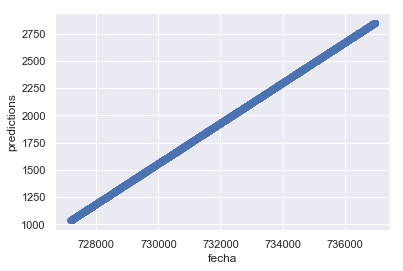

In [35]:
# Visualize the inputs and predicted values
plt.scatter(X_test, y_predic)
plt.xlabel('fecha')
plt.ylabel('predictions')
plt.show()

In [36]:
# coeficiente de determinación
# mejor puntuación posible 1

from sklearn.metrics import r2_score, mean_squared_error

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_predic))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_predic))

Mean squared error: 226888.38
Variance score: 0.54


In [37]:
# calcular la prediccion del dolar para la fecha deseada 23-nov-2018

from datetime import datetime as dt
d = dt.strptime('2018-11-23', '%Y-%m-%d').date()
print(d)

print(d.toordinal())


2018-11-23
737021


In [38]:
trm_bf_2018 = regr.predict([[737021]])
print('El valor de la TRM esperado para el Black Friday es: ${} pesos'.format(round(trm_bf_2018[0])))

El valor de la TRM esperado para el Black Friday es: $2859.0 pesos
